In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [2]:
def euclidean_distance(a, b, with_numpy=True):  # Метод для вычисления евклидового расстояния
    if with_numpy:
        return np.linalg.norm(a - b)
    else:
        if len(a) != len(b):
            return False
        else:
            toReturn = 0
            for item in a - b:
                toReturn += item**2
            return math.sqrt(toReturn)

In [5]:
def knn(k):
    dataset_matrix_teach = pd.read_csv("haberman.data").to_numpy()[:210]  # Первые 210 обьектов из датасета
    dataset_matrix_test = pd.read_csv("haberman.data").to_numpy()[210:]  # Последние 95 обьектов из датасета
    success_count = 0  # Переменная для подсчета количества успешных тестов
    for instance_test in dataset_matrix_test:
        distance_matrix_list = (
            []
        )  # Матрица, вектора которой состоят из 2 значений: класс и длинна до обьекта учителя от обьекта тестового
        for instance_teach in dataset_matrix_teach:
            distance_matrix_list.append(
                [
                    instance_teach[-1],
                    euclidean_distance(instance_test[:-1], instance_teach[:-1]),
                ]
            )
        distance_matrix_array = np.array(distance_matrix_list)
        distance_matrix_array_sorted = distance_matrix_array[distance_matrix_array[:, 1].argsort()]  # Сортируем матрицу
        knn_array = [
            vector[0] for vector in distance_matrix_array_sorted[:k]
        ]  # Берём в отсортированной матрице первые k элементов, а именно их нулевые значения, то есть классы ближайших соседей
        prediction = 1 if knn_array.count(1) > knn_array.count(2) else 2  # Голосование
        success = prediction == instance_test[-1]  # Проверка
        if success:
            success_count += 1
    #         print(f"1: {knn_array.count(1)}, 2: {knn_array.count(2)}, prediction: {prediction}, real result: {instance_test[-1]} {'SUCCESS' if success else 'FAIL'}") #Для отладки
    print(
        f"Success rate: {success_count}/{len(dataset_matrix_test)}({success_count/len(dataset_matrix_test)*100:4.2f}%) on {len(dataset_matrix_teach)} teaching objects and {len(dataset_matrix_test)} testes"
    )

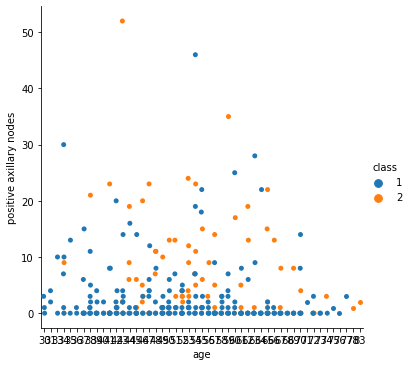

In [3]:
# Метод отрисовки, по абсцисе возраст пациента на момент операции, по ординате какой-то медицинский показатель, в душе не чаю что он отражает:), в hue класс: прожил ли пациент более 5 лет после операции
dataset = pd.read_csv("haberman.data")
dataset.drop(
    "year of operation", axis=1
)  # Убираем из датасета показатель "год проведения операции", дабы отразить график только по 3 показателям
sns.catplot(x="age", y="positive axillary nodes", hue="class", data=dataset)

In [6]:
knn(5)

Success rate: 72/96(75.00%) on 210 teaching objects and 96 testes


SyntaxError: unexpected EOF while parsing (<ipython-input-7-6ccad8358cd9>, line 1)

Couldn't evaluate or find in history: (5)
